In [348]:
#importing important libraries
import numpy as np
import pandas as pd
import datetime as dt
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [349]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

In [350]:
# Importing the dataset
data = pd.read_csv("D:/UG/18iLead Score case study/Lead Scoring Assignment/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### DATA INSPECTION

In [351]:
data.shape

(9240, 37)

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [353]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [354]:
# checking for the null values
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##### There are a lot of null values.
##### As statted many categorical columns have 'select' as a level we'll replace them with Null.
##### We'll also convert all the cat values in lower case for correct representation of levels.

### DATA CLEANING

In [355]:
# checking for duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0
sum(data.duplicated(subset = 'Lead Number')) == 0

True

Prospect ID & Lead Number are like ID numbers and shows that there are no duplicate ids.

In [356]:
# Converting all the values to lower case
data = data.applymap(lambda x:x.lower() if type(x) == str else x)

In [357]:
#Converting 'Select' values to NaN.

data = data.replace('select', np.nan)

In [358]:
# Checking the percentage of missing values
nasum= (data.isnull().sum() / len(data)) * 100
nasum.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We'll remove the columns having more than 35% of missing values

In [359]:
#dropping cols with more than 35% missing values
cols_to_drop = nasum[nasum >= 35].index
data.drop(cols_to_drop, axis=1, inplace=True)

In [360]:
# checking the missing values again
((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Prospect ID                                       0.0000

#### Checking Individual columns: Categorical Analysis

In [361]:
data['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100 

What matters most to you in choosing a course
better career prospects      70.649351
NaN                          29.318182
flexibility & convenience     0.021645
other                         0.010823
Name: proportion, dtype: float64

column is heavily skewed with 'better career prospects' and NaN values(~99%) and hence we'll drop this column.

In [362]:
data.drop('What matters most to you in choosing a course', axis = 1, inplace = True) 

In [363]:
data['What is your current occupation'].value_counts(normalize= True)*100

What is your current occupation
unemployed              85.496183
working professional    10.778626
student                  3.206107
other                    0.244275
housewife                0.152672
businessman              0.122137
Name: proportion, dtype: float64

As we can see there are many low representing cat levels. Let's join them for better representation

In [364]:
# Combine low-representing categories
data.loc[data['What is your current occupation'].isin(['other', 'housewife', 'businessman']), 'What is your current occupation'] = 'others'

In [365]:
data['What is your current occupation'].value_counts(normalize= True)*100

What is your current occupation
unemployed              85.496183
working professional    10.778626
student                  3.206107
others                   0.519084
Name: proportion, dtype: float64

Instead of imputing NaN values with just 'unemployed', we'll impute them proportionately to take care of the bias

In [366]:
data['What is your current occupation'] = data['What is your current occupation'].fillna(pd.Series(np.random.choice(['unemployed', 'working professional', 'student', 'others'], p = [0.8550, 0.1078, 0.0320, 0.0052], size = len(data)))) 

In [367]:
data['What is your current occupation'].value_counts(normalize= True)*100

What is your current occupation
unemployed              85.865801
working professional    10.476190
student                  3.160173
others                   0.497835
Name: proportion, dtype: float64

In [368]:
data.Country.value_counts(normalize= True, dropna = False)

Country
india                   0.702597
NaN                     0.266342
united states           0.007468
united arab emirates    0.005736
singapore               0.002597
saudi arabia            0.002273
united kingdom          0.001623
australia               0.001407
qatar                   0.001082
bahrain                 0.000758
hong kong               0.000758
oman                    0.000649
france                  0.000649
unknown                 0.000541
kuwait                  0.000433
south africa            0.000433
canada                  0.000433
nigeria                 0.000433
germany                 0.000433
sweden                  0.000325
philippines             0.000216
uganda                  0.000216
italy                   0.000216
bangladesh              0.000216
netherlands             0.000216
asia/pacific region     0.000216
china                   0.000216
belgium                 0.000216
ghana                   0.000216
kenya                   0.000108
sr

In [369]:
data['Country'] = data['Country'].fillna('not provided')

In [370]:
def cats(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

data['Country'] = data.apply(lambda x:cats(x['Country']), axis = 1)
data['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [371]:
#Checking the 'TotalVisits' column
data['TotalVisits'].value_counts(normalize=True, dropna=False) * 100

TotalVisits
0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: proportion, dtype: float64

In [372]:
# Filling missing values in 'TotalVisits' with the mode of the column
data['TotalVisits'] = data['TotalVisits'].fillna(data['TotalVisits'].mode()[0])

In [373]:
data['TotalVisits'].value_counts(normalize=True, dropna=False) * 100         #checking

TotalVisits
0.0      25.173160
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: proportion, dtype: float64

In [374]:
#Checking the 'Page Views Per Visit' column
data['Page Views Per Visit'].value_counts(dropna=False)

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: count, Length: 115, dtype: int64

In [375]:
data['Page Views Per Visit'].nunique()

114

In [376]:
# Filling missing values in 'Page Views Per Visit' with the mode of the column
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mode()[0])

In [377]:
#Checking the 'Last Activity' column
data['Last Activity'].value_counts(dropna=False)

Last Activity
email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

In [378]:
# Filling missing values in 'Last Activity' with the mode of the column
data['Last Activity'] = data['Last Activity'].fillna(data['Last Activity'].mode()[0])

In [379]:
#Checking the 'Lead Source' column
data['Lead Source'].value_counts(dropna=False)

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: count, dtype: int64

In [380]:
# Filling missing values in 'Lead Source' with the mode of the column
data['Lead Source'] = data['Lead Source'].fillna(data['Lead Source'].mode()[0])

In [381]:
# rechecking for the missing values
data.isnull().sum().sort_values(ascending=False)

Prospect ID                                 0
Lead Number                                 0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
What is your current occupation             0
Country                                     0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                       

In [382]:
data.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   20
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Country                                        3
What is your current occupation                4
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

There are few cat columns with just 1 level, we can drop them too

In [383]:
data[data.columns[data.nunique()== 1]].head()

,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
0,no,no,no,no,no
1,no,no,no,no,no
2,no,no,no,no,no
3,no,no,no,no,no
4,no,no,no,no,no


In [384]:
data1= data.drop(data.columns[data.nunique()== 1], axis=1)

In [385]:
#checking the value counts of all the cat columns
for column in data1:
    print(data1[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import     

In [386]:
data1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,unemployed,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,no,no,no,no,no,no,no,modified


In [387]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [388]:
# Removing 'Prospect Id' and 'Lead Number' values since they are unique for everyone
data1.drop('Prospect ID',axis= 1, inplace= True)
data1.drop('Lead Number',axis= 1, inplace= True)
data1.shape

(9240, 19)

Our final data has 19 columns and 9240 non-null rows.

### EXPLORATORY DATA ANALYSIS

#### Checking cat columns first

In [389]:
#checking the lead conversion rate, this is our target variable
Conversion_rate = (sum(data1['Converted'])/len(data1['Converted'].index))*100
Conversion_rate

38.53896103896104

In [390]:
data1.select_dtypes(include= 'object').head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,page visited on website,not provided,unemployed,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,email opened,india,unemployed,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,email opened,india,student,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,unreachable,india,unemployed,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,converted to lead,india,unemployed,no,no,no,no,no,no,no,modified


In [391]:
data1.select_dtypes(include= 'object').columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### 1 Lead Origin

In [392]:
data1['Lead Origin'].value_counts()

Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64

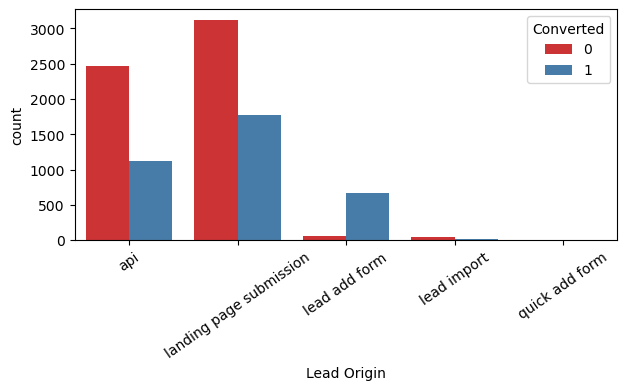

In [393]:
plt.figure(figsize=(7,3))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data1, palette='Set1')
plt.xticks(rotation = 35)
plt.show()

In [394]:
data1.groupby('Lead Origin')['Converted'].value_counts(normalize=True)

Lead Origin              Converted
api                      0            0.688547
                         1            0.311453
landing page submission  0            0.638150
                         1            0.361850
lead add form            1            0.924791
                         0            0.075209
lead import              0            0.763636
                         1            0.236364
quick add form           1            1.000000
Name: proportion, dtype: float64

##### 'API' and 'Landing Page Submission' have 31-36% conversion rate and high leads count.
##### Lead Add Form has 92% conversion rate but low lead count.
##### Lead Import are negligble count.


##### 2 Lead Source

In [395]:
data1['Lead Source'].value_counts()

Lead Source
google               2909
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

In [396]:
# As there are too many low count Sources, we'll be creating a new category 'Others' for them.
#data1['Lead Source'] = data1['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
data1['Lead Source'] = data1['Lead Source'].apply(lambda x: x if ((x== 'google') | (x=='direct traffic') | (x=='olark chat') |  (x=='organic search') | (x=='reference') | (x=='welingak website') | (x=='referral sites') | (x=='referral sites'))else 'Others') 

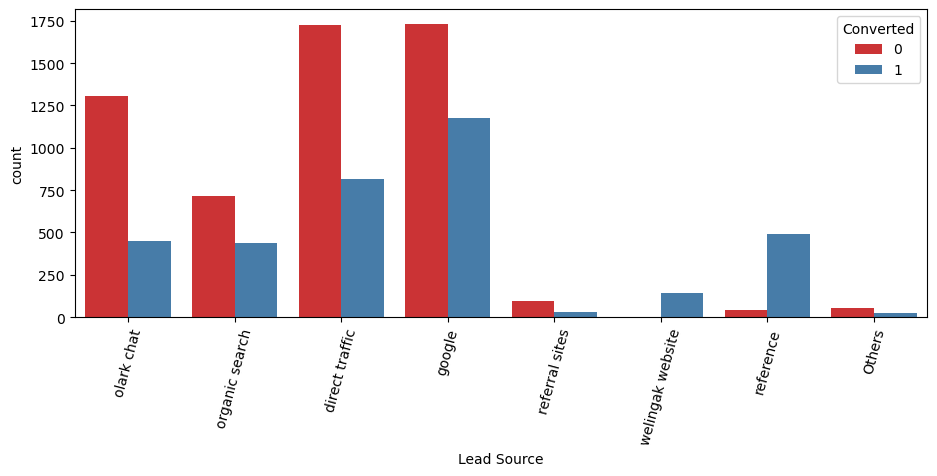

In [397]:
plt.figure(figsize=(11,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = data1, palette='Set1')
plt.xticks(rotation = 75)
plt.show()

In [398]:
data1.groupby('Lead Source')['Converted'].value_counts(normalize=True)

Lead Source       Converted
Others            0            0.717949
                  1            0.282051
direct traffic    0            0.678333
                  1            0.321667
google            0            0.595737
                  1            0.404263
olark chat        0            0.744729
                  1            0.255271
organic search    0            0.622184
                  1            0.377816
reference         1            0.917603
                  0            0.082397
referral sites    0            0.752000
                  1            0.248000
welingak website  1            0.985915
                  0            0.014085
Name: proportion, dtype: float64

##### Google, Direct traffic and olark chat generates maximum number of leads, and should be focused for improving the lead conversion rate.
##### Reference and Welingak website have the highest conversion rate but low leads count.

##### 3 'Do Not Email', 'Do Not Call'

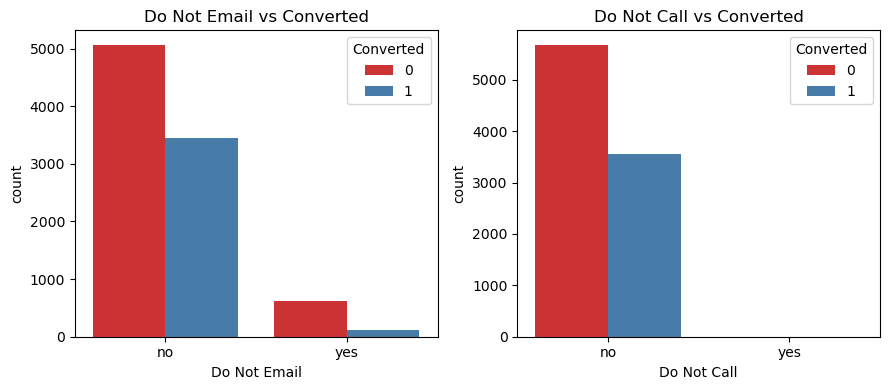

In [399]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Plot 1: Do Not Email
sns.countplot(x="Do Not Email", hue="Converted", data=data1, palette='Set1', ax=axes[0])
axes[0].set_title('Do Not Email vs Converted')

# Plot 2: Do Not Call
sns.countplot(x="Do Not Call", hue="Converted", data=data1, palette='Set1', ax=axes[1])
axes[1].set_title('Do Not Call vs Converted')

plt.tight_layout()
plt.show()

These two columns appear to be insignificant. 'Do Not Call' can be dropped.

In [400]:
data2= data1.drop('Do Not Call', axis=1)

In [401]:
data2.shape

(9240, 18)

##### 4 Last Activity

In [402]:
data2['Last Activity'].value_counts()

Last Activity
email opened                    3540
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

In [403]:
data2['Last Activity'] = data2['Last Activity'].replace(['unsubscribed',
                                                         'unreachable',
                                                        'had a phone conversation', 
                                                        'approached upfront',
                                                        'view in browser link clicked',       
                                                        'email marked spam',                  
                                                        'email received','resubscribed to emails',
                                                         'visited booth in tradeshow'],'Others')

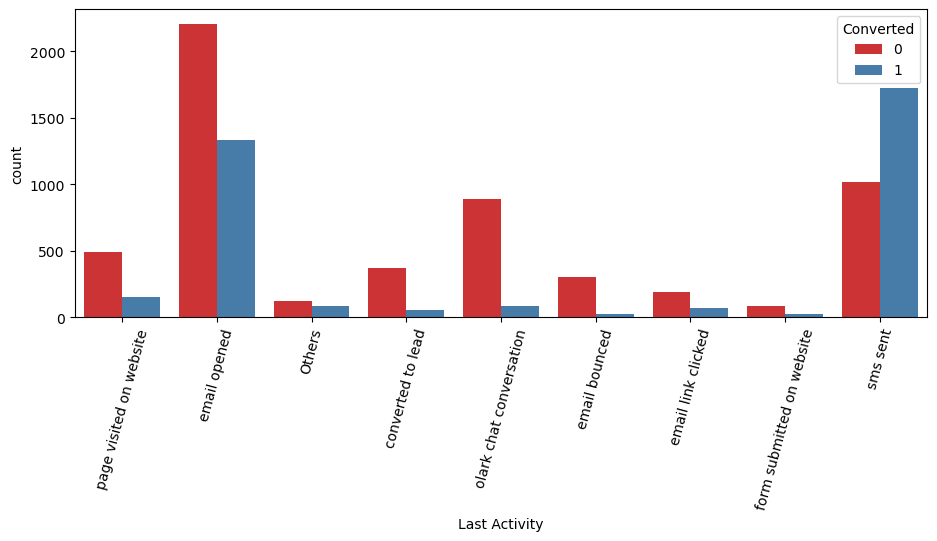

In [404]:
plt.figure(figsize=(11,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = data2, palette='Set1')
plt.xticks(rotation = 75)
plt.show()

In [405]:
data2.groupby('Last Activity')['Converted'].value_counts(normalize=True)

Last Activity              Converted
Others                     0            0.590244
                           1            0.409756
converted to lead          0            0.873832
                           1            0.126168
email bounced              0            0.920245
                           1            0.079755
email link clicked         0            0.726592
                           1            0.273408
email opened               0            0.623164
                           1            0.376836
form submitted on website  0            0.758621
                           1            0.241379
olark chat conversation    0            0.913669
                           1            0.086331
page visited on website    0            0.764062
                           1            0.235937
sms sent                   1            0.629144
                           0            0.370856
Name: proportion, dtype: float64

##### 'Email opened' and 'sms sent' are the two  most frequent last activity.
##### olark chat conversation, 'email bounced' and 'page visited on website' have one of the lowest coversion rate with decent counts.

##### 5 Country

In [406]:
data2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

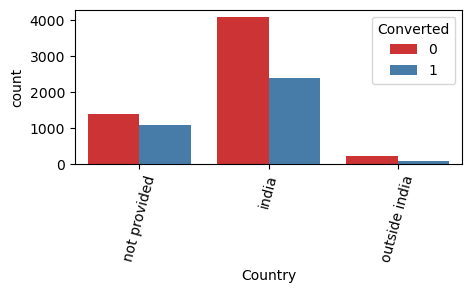

In [407]:
plt.figure(figsize=(5,2))
sns.countplot(x = "Country", hue = "Converted", data = data2, palette='Set1')
plt.xticks(rotation = 75)
plt.show()

In [408]:
data2.groupby('Country')['Converted'].value_counts(normalize=True)

Country        Converted
india          0            0.630160
               1            0.369840
not provided   0            0.562779
               1            0.437221
outside india  0            0.707317
               1            0.292683
Name: proportion, dtype: float64

##### India has the highest number of leads.lead conversion drops slighly for non-indian leads.
##### Leads whose country are not provided has higher conversion rate.

##### 6  What is your current occupation

In [409]:
data2['What is your current occupation'].value_counts()

What is your current occupation
unemployed              7934
working professional     968
student                  292
others                    46
Name: count, dtype: int64

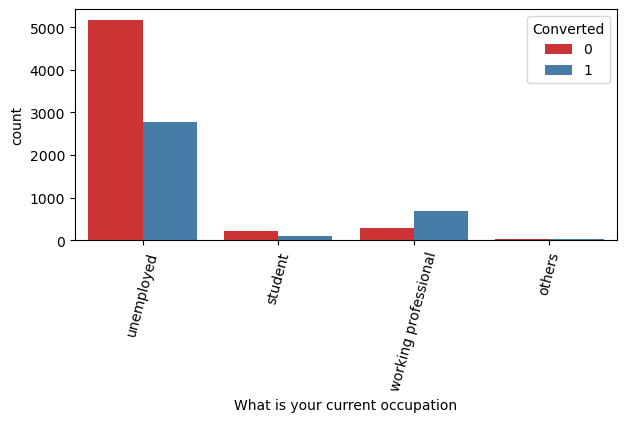

In [410]:
plt.figure(figsize=(7,3))
sns.countplot(x = 'What is your current occupation', hue = "Converted", data = data2, palette='Set1')
plt.xticks(rotation = 75)
plt.show()

##### Most of the leads are unemployed but working professionals have far higher conversion rate. 

##### 7 Search

In [411]:
data2.Search.value_counts()

Search
no     9226
yes      14
Name: count, dtype: int64

It is having heavy data imbalance and hence is insignificant and we can drop this.

In [412]:
data2.drop('Search', axis=1, inplace= True)

In [413]:
data2.shape

(9240, 17)

##### 8 Newspaper Article

In [414]:
data2['Newspaper Article'].value_counts()

Newspaper Article
no     9238
yes       2
Name: count, dtype: int64

It is having heavy data imbalance and hence is insignificant and we can drop this.

In [415]:
data2.drop('Newspaper Article', axis=1, inplace= True)

In [416]:
data2.shape

(9240, 16)

##### 9 X Education Forums

In [417]:
data2['X Education Forums'].value_counts()

X Education Forums
no     9239
yes       1
Name: count, dtype: int64

It is having heavy data imbalance and hence is insignificant and we can drop this.

In [418]:
data2.drop('X Education Forums', axis=1, inplace= True)

In [419]:
data2.shape

(9240, 15)

##### 10 Newspaper

In [420]:
data2['Newspaper'].value_counts()

Newspaper
no     9239
yes       1
Name: count, dtype: int64

It is having heavy data imbalance and hence is insignificant and we can drop this.

In [421]:
data2.drop('Newspaper', axis=1, inplace= True)

In [422]:
data2.shape

(9240, 14)

##### 11 Digital Advertisement

In [423]:
data2['Digital Advertisement'].value_counts()

Digital Advertisement
no     9236
yes       4
Name: count, dtype: int64

It is having heavy data imbalance and hence is insignificant and we can drop this.

In [424]:
data2.drop('Digital Advertisement', axis=1, inplace= True)

In [425]:
data2.shape

(9240, 13)

##### 12 Through Recommendations

In [426]:
data2['Through Recommendations'].value_counts()

Through Recommendations
no     9233
yes       7
Name: count, dtype: int64

It is having heavy data imbalance and hence is insignificant and we can drop this.

In [427]:
data2.drop('Through Recommendations', axis=1, inplace= True)

In [428]:
data2.shape

(9240, 12)

##### 13 A free copy of Mastering The Interview

In [429]:
data2['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
no     6352
yes    2888
Name: count, dtype: int64

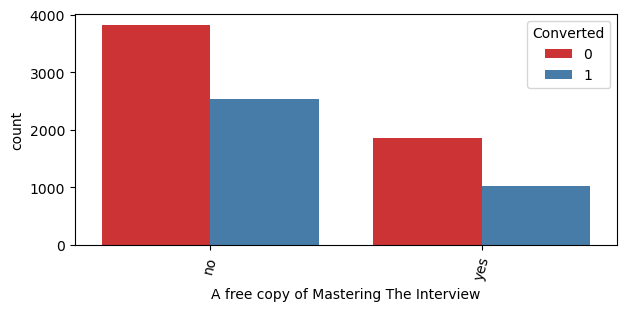

In [430]:
plt.figure(figsize=(7,3))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = "Converted", data = data2, palette='Set1')
plt.xticks(rotation = 75)
plt.show()

Most of the leads didn't take 'a free copy of mastering the interview'. Nothing more significant.

##### 14 Last Notable Activity

In [431]:
data2['Last Notable Activity'].value_counts()

Last Notable Activity
modified                        3407
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: count, dtype: int64

In [432]:
data2['Last Notable Activity'] = data2['Last Notable Activity'].replace(['unsubscribed',
                                                        'had a phone conversation', 
                                                        'approached upfront',
                                                        'view in browser link clicked',       
                                                        'email marked spam',                  
                                                        'email received','resubscribed to emails',
                                                         'visited booth in tradeshow', 'form submitted on website', 'had a phone conversation', 'unreachable'],'Others')

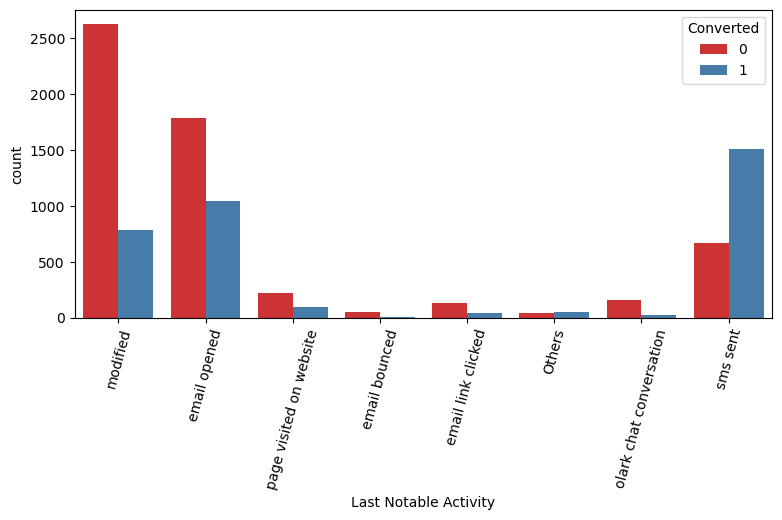

In [433]:
plt.figure(figsize=(9,4))
sns.countplot(x = 'Last Notable Activity', hue = "Converted", data = data2, palette='Set1')
plt.xticks(rotation = 75)
plt.show()

In [434]:
pivot_table = (
    data2.groupby('Last Notable Activity')['Converted'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    .pivot_table(index='Last Notable Activity', columns='Converted', values='Percentage', fill_value=0)
)
pivot_table

Converted,0,1
Last Notable Activity,,
Others,46.000000,54.000000
email bounced,85.000000,15.000000
email link clicked,73.988439,26.011561
email opened,63.070393,36.929607
modified,77.017904,22.982096
olark chat conversation,86.338798,13.661202
page visited on website,70.754717,29.245283
sms sent,30.570902,69.429098


##### 'modified', 'email opened' and 'sms sent' have the highest counts.
##### 'olark chat conversation' 'email bounced' again have lowest conversion rate and 'sms sent' have the best conversion rate.

In [435]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

#### Now checking the Numerical columns

In [436]:
data2.select_dtypes(include= ['int64', 'float64']).sample(6)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4149,1,0.0,0,0.0
9137,0,0.0,0,0.0
134,1,0.0,889,0.0
5373,1,5.0,451,5.0
8487,0,2.0,345,2.0
8671,0,3.0,294,1.5


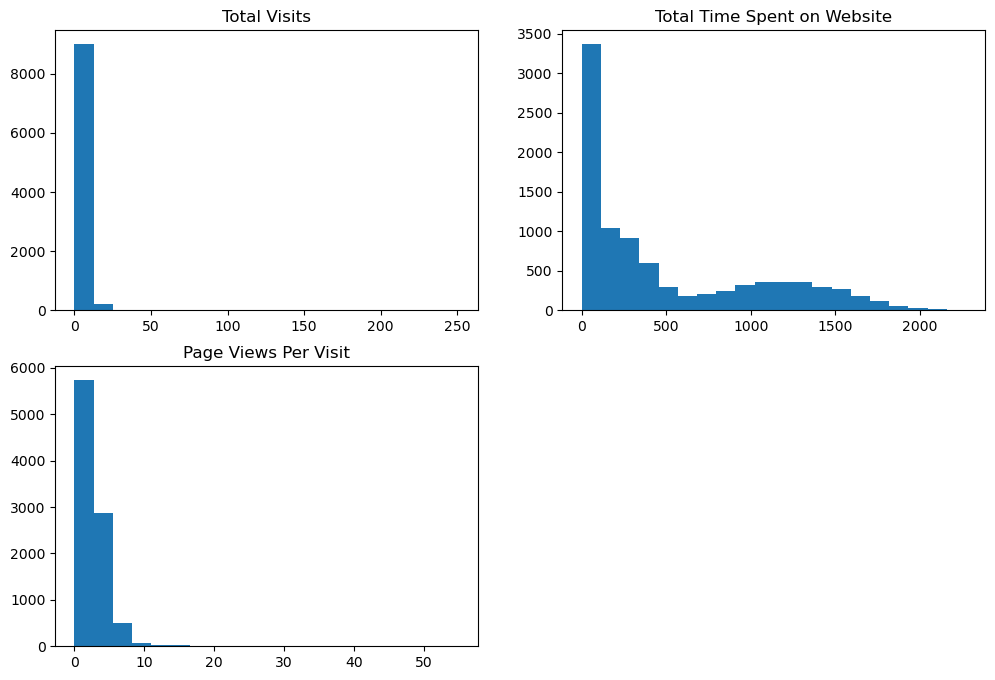

In [437]:
# checking distribution of all the num columns
fig = plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.hist(data2.TotalVisits, bins = 20)
plt.title('Total Visits')

plt.subplot(2, 2, 2)
plt.hist(data2['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(2, 2, 3)
plt.hist(data2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')

plt.show()

##### Num columns seem to be skewed and having outliers. Let's treat them next.

In [438]:
# Convert 'Last Activity' to integer datatype as total number of visits will always be a whole number
data2['TotalVisits'] = data2['TotalVisits'].astype('int')

##### 1 TotalVisits

In [439]:
data2['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])     #data spread

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

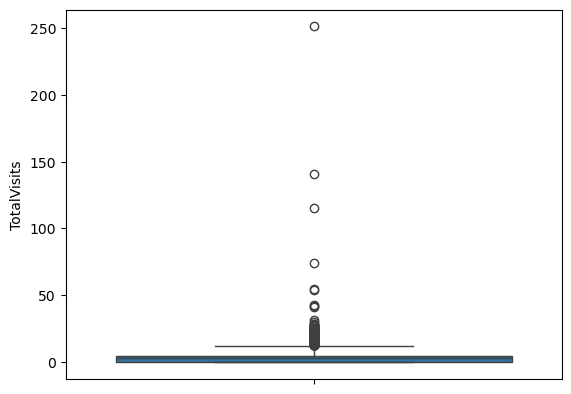

In [440]:
# Checking for outliers
sns.boxplot(data2['TotalVisits'],orient='vert')
plt.show()

In [441]:
# as there are many outliers, we'll treat them for our analysis
percentiles = data2['TotalVisits'].quantile([0.05,0.95]).values
data2['TotalVisits'][data2['TotalVisits'] <= percentiles[0]] = percentiles[0]
data2['TotalVisits'][data2['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

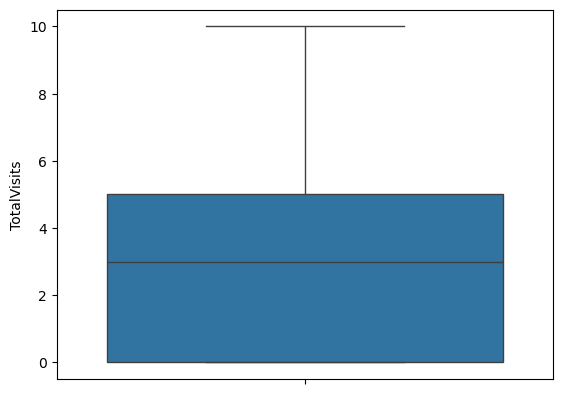

In [442]:
# Visualizing once again
sns.boxplot(data2['TotalVisits'],orient='vert')

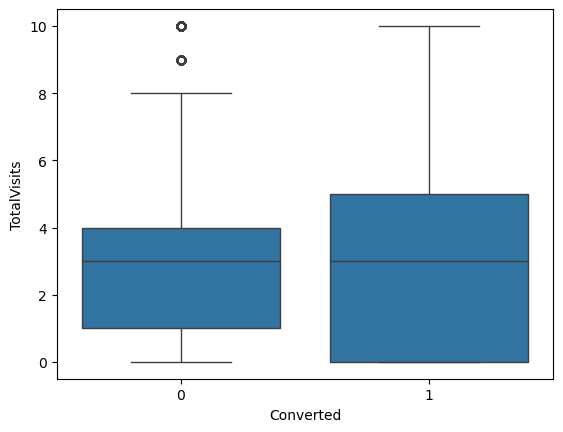

In [443]:
# plotting boxplot of TotalVisits for converted cat
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data2)
plt.show()

Median for converted and not converted leads are the same.

##### 2 Total Time Spent on Website

In [444]:
data2['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

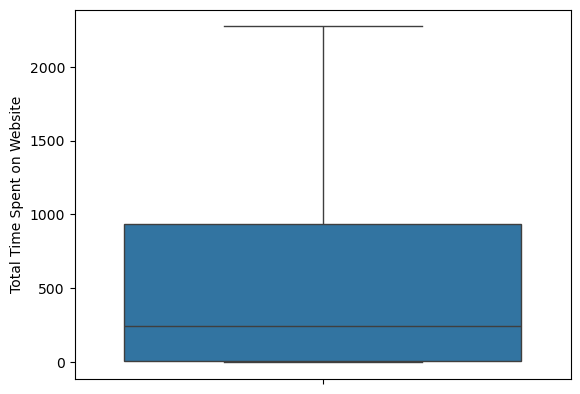

In [445]:
sns.boxplot(data2['Total Time Spent on Website'],orient='vert')
plt.show()

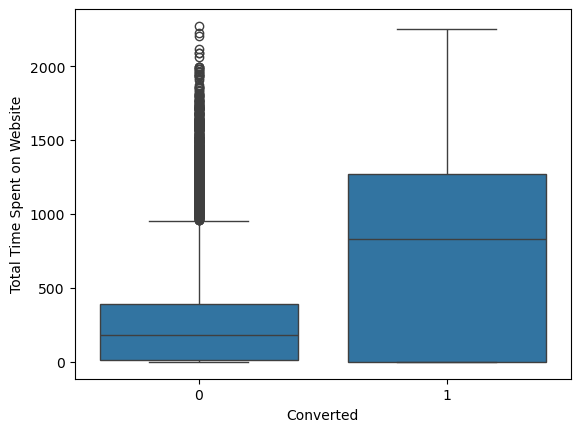

In [446]:
#there don't seem to be too many outliers, we can continue analyzing it against converted column
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data2)
plt.show()

Leads spending more time on the weblise are more likely to be converted.

##### 3 Page Views Per Visit

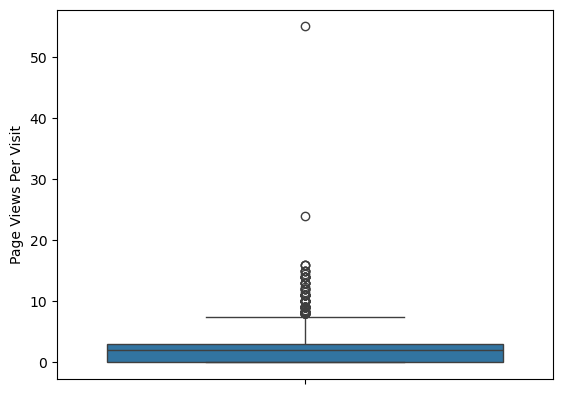

In [447]:
sns.boxplot(data2['Page Views Per Visit'],orient='vert')
plt.show()

In [448]:
percentiles = data2['Page Views Per Visit'].quantile([0.05,0.95]).values
data2['Page Views Per Visit'][data2['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data2['Page Views Per Visit'][data2['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

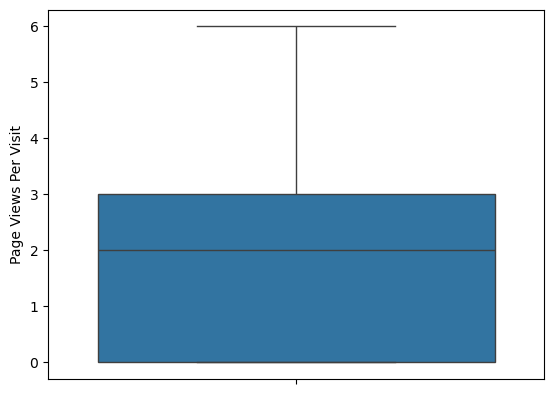

In [449]:
sns.boxplot(data2['Page Views Per Visit'],orient='vert')
plt.show()

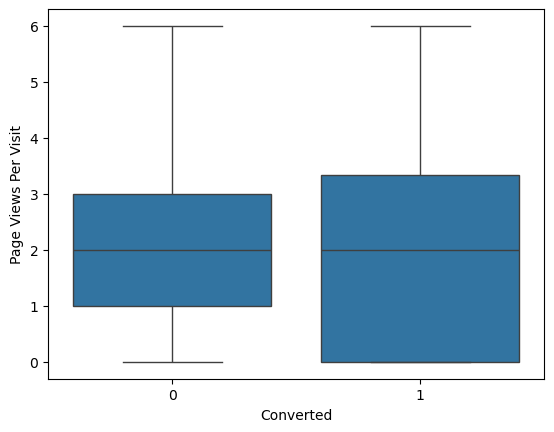

In [450]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =data2)
plt.show()

Median for converted and unconverted leads is the same.

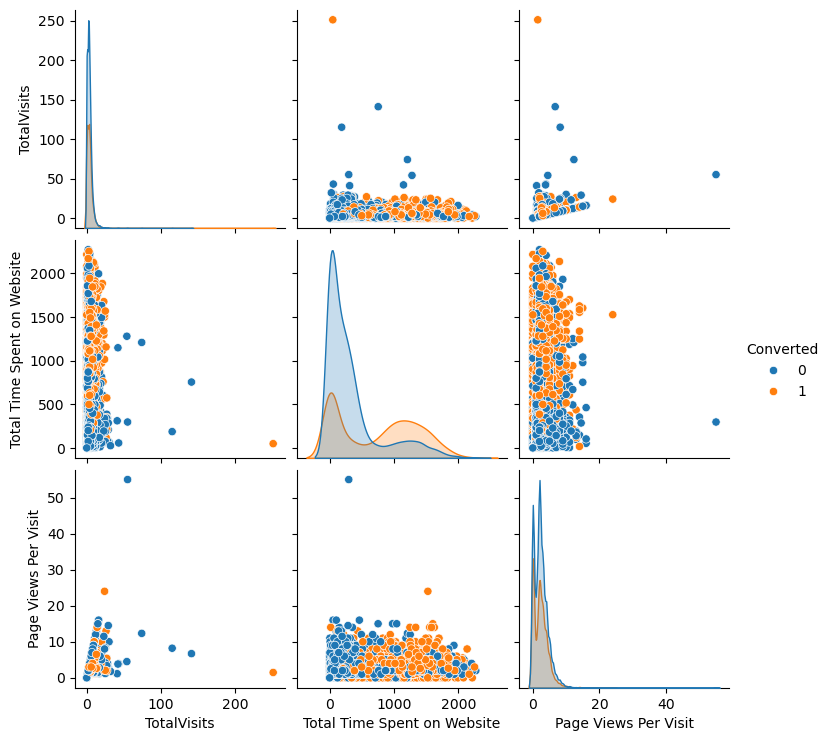

In [451]:
sns.pairplot(data1, diag_kind='kde',hue='Converted')
plt.show()

##### "Converted" (orange) points are more concentrated in the upper-right region of this plot, suggesting that higher total visits and longer time spent on the website may result in higher conversion rate.
##### leads who convert might be navigating fewer pages but still have a high number of visits.
##### Although, the time spent is a more critical factor for conversion than the number of pages viewed, most leads view a small number of pages per visit.

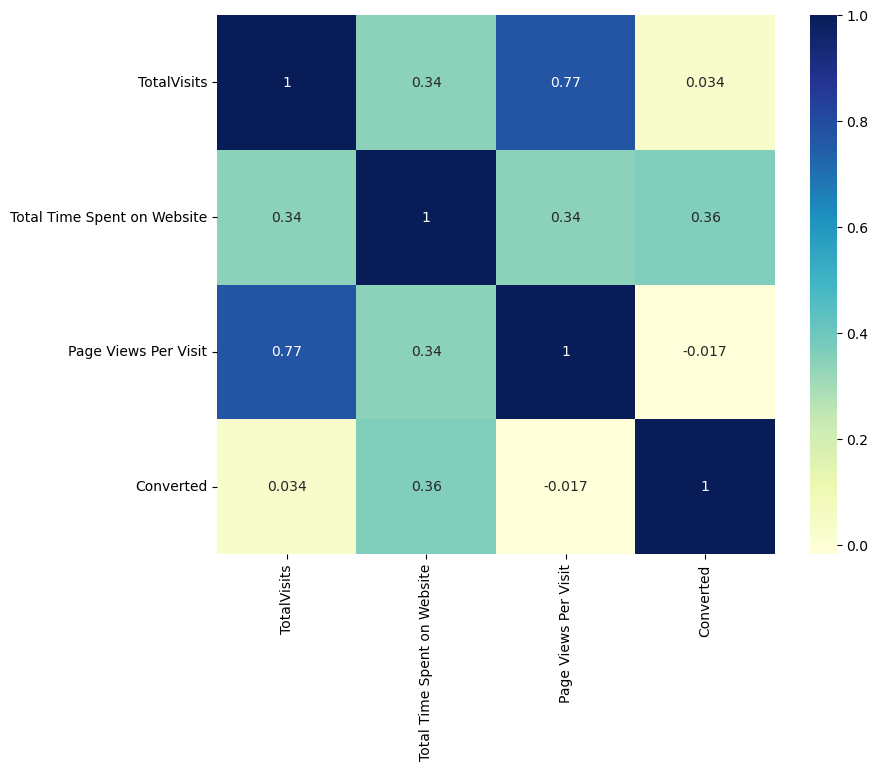

In [452]:
# checking correlation of Num columns
plt.figure(figsize = (9,7))
sns.heatmap(data2[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']].corr(), cmap="YlGnBu", annot = True)
plt.show()

##### Page Views Per Visit and TotalVisits are positively strongly correlated.

In [453]:
 # determine unique values
for a, b in data2.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Lead Origin = 5
Lead Source = 8
Do Not Email = 2
Last Activity = 9
Country = 3
What is your current occupation = 4
A free copy of Mastering The Interview = 2
Last Notable Activity = 8


##### Let's convert binary and create dummy variables for cat columns

In [454]:
 binary = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function to convert binary to 0 & 1
def map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data2[binary] = data2[binary].apply(map)

# check the operation was success
data2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0,0,0.0,page visited on website,not provided,unemployed,0,modified
1,api,organic search,0,0,5,674,2.5,email opened,india,unemployed,0,email opened
2,landing page submission,direct traffic,0,1,2,1532,2.0,email opened,india,student,1,email opened
3,landing page submission,direct traffic,0,0,1,305,1.0,Others,india,unemployed,0,modified
4,landing page submission,google,0,1,2,1428,1.0,converted to lead,india,unemployed,0,modified


In [455]:
# Creating dummy variables for some cat columns and dropping the first one. We'll concat the new dataframe obtained.
dummy_df = pd.get_dummies(data2[['Lead Origin', 'Country', 'What is your current occupation']], drop_first = True)
dummy_df= dummy_df.astype('uint8')
df = pd.concat([data2, dummy_df], axis=1)

##### we'll create dummy variables for below columns individually to make sure we drop the grouped 'Others'.

In [456]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)
dummy= dummy.astype('uint8')
df = pd.concat([df, dummy], axis = 1)

In [457]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis=1)
dummy= dummy.astype('uint8')
df = pd.concat([df, dummy], axis = 1)

In [458]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], axis = 1)
dummy= dummy.astype('uint8')
df = pd.concat([df, dummy], axis = 1)

In [459]:
# converting boolean characters to unit8 to skip any error.
df['A free copy of Mastering The Interview']= df['A free copy of Mastering The Interview'].astype('uint8')
df['Do Not Email']= df['Do Not Email'].astype('uint8')

In [460]:
 # Dropping the columns for which dummies have been created
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'What is your current occupation', 'Last Notable Activity'], axis = 1, inplace = True)

df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Country_not provided,Country_outside india,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,5,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2,1532,2.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   uint8  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   int32  
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   uint8  
 6   Lead Origin_landing page submission                   9240 non-null   uint8  
 7   Lead Origin_lead add form                             9240 non-null   uint8  
 8   Lead Origin_lead import                               9240

In [462]:
df.shape

(9240, 37)

Our data seems to be ready for Model Building process

### DATA PREPRATION

#### Splitting the data

In [467]:
X = df.drop('Converted', axis=1)  # features
y = df.Converted                  # Target Variable

In [471]:
X.shape, y.shape

((9240, 36), (9240,))

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [475]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6468, 36), (2772, 36), (6468,), (2772,))

#### Scaling the features

In [476]:
from sklearn.preprocessing import MinMaxScaler
# Scaling only the three num features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Country_not provided,Country_outside india,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
8998,0,0.3,0.175176,0.500000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
579,0,1.0,0.043574,1.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5240,0,1.0,0.458627,0.916667,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1452,0,0.6,0.143486,0.500000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3891,0,0.5,0.178697,0.833333,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


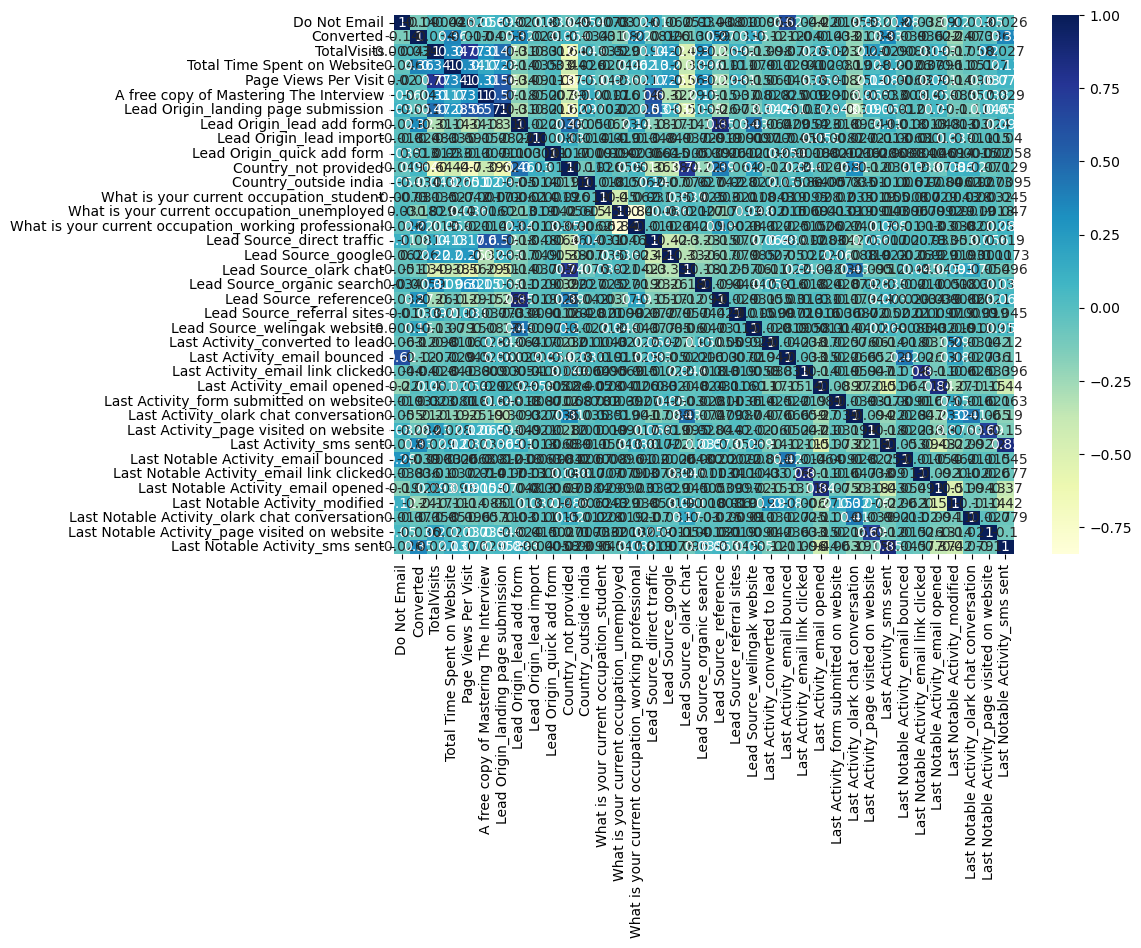

In [479]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,7))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

Too many Features

### MODEL BUILDING